In [262]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [263]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [264]:
import pandas as pd
import numpy as np

In [265]:
#Function for reading files
def read_csv_with_fallback(filepath, encoding1='utf-16', encoding2='utf-8'):
    try:
        return pd.read_csv(filepath, encoding=encoding1)
    except UnicodeDecodeError:
        try:
            return pd.read_csv(filepath, encoding=encoding2, encoding_errors='replace')
        except UnicodeDecodeError:
            print(f"Failed to read the file: {filepath}")
            return None

In [266]:
# Try reading the file with utf-16 encoding first
TSG_Children = read_csv_with_fallback("TSG Import/TSGChildren.csv")

In [267]:
# Try reading the file with utf-16 encoding first
Enrollment_report =read_csv_with_fallback("TSG Import/Enrollmentreport.csv")


In [268]:
#Report 6510 in CP
TSG_CP_Export = read_csv_with_fallback("TSG Import/TSG6510.csv")

In [269]:
TSG_CP_Export.shape

(860, 21)

In [270]:
TSG_MasterFile = pd.read_csv("TSG Import/Python TSG_Test_ Master Import Prep File 2025 yr.csv", index_col=None)
TSG_FinalExport= pd.read_csv("TSG Import/TSG final template.csv", index_col=None)

In [271]:
TSG_MasterFile.head()

,mm/dd/yy\nbirthdate,raceID,ethID,LastName,FirstName,firstDayInProgram,genderID,sourceChildID,classID,languageID,...,IEPID,partBEntryDate,partBentrytoolid,partBExitToolID,CustomResponseValue5 (Copy to import file),IFSPID,partCEntryDate,partCentrytoolid,spanishObj_FL,colorID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
TSG_CP_Export.shape

(860, 21)

In [273]:
TSG_Children_Export = read_csv_with_fallback("TSG Import/TSGChildren.csv")

In [274]:
original_columns = TSG_MasterFile.columns

# Step 2: Create a new empty DataFrame with the same columns and new row count
TSG_MasterFile = pd.DataFrame(columns=original_columns)
TSG_MasterFile = TSG_MasterFile.reindex(range(len(TSG_CP_Export)))


In [275]:
#column_names = TSG_CP_Export.columns.tolist()
#print(column_names)

In [276]:
#column_names_Master = TSG_MasterFile.columns.tolist()
#print(column_names_Master)

In [277]:
TSG_MasterFile['mm/dd/yy\nbirthdate'] = TSG_CP_Export['birthdate']

In [278]:
TSG_MasterFile.shape

(860, 31)

In [279]:
TSG_MasterFile['raceID'] = TSG_CP_Export['raceID']
TSG_MasterFile['ethID'] = TSG_CP_Export['ethID']
TSG_MasterFile['LastName'] = TSG_CP_Export['lastName']
TSG_MasterFile['FirstName'] = TSG_CP_Export['firstName']
TSG_MasterFile['genderID'] = TSG_CP_Export['genderID']
TSG_MasterFile['sourceChildID'] = TSG_CP_Export['sourceChildID']
TSG_MasterFile['classID'] = TSG_CP_Export['classID']
TSG_MasterFile['languageID'] = TSG_CP_Export['languageID']
TSG_MasterFile['middleInitial'] = TSG_CP_Export['middleInitial']


In [280]:
TSG_CP_Export['studentID'] = TSG_CP_Export['identifier'].str.split(':').str[1].str.strip()

# Optionally, convert to numeric if you want to perform further calculations
TSG_CP_Export['studentID'] = pd.to_numeric(TSG_CP_Export['studentID'], errors='coerce')
TSG_CP_Export['studentID'].head()

0    213197
1    207450
2    207454
3    209465
4    208520
Name: studentID, dtype: int64

In [281]:
TSG_MasterFile['studentID'] = TSG_CP_Export['studentID']

In [282]:
TSG_MasterFile['studentID'].head()

0    213197
1    207450
2    207454
3    209465
4    208520
Name: studentID, dtype: int64

In [283]:
TSG_MasterFile.shape

(860, 31)

In [284]:
Enrollment_report['AZED ID'].head()

0    17865411
1    26319227
2    35362411
3    36683963
4    58981284
Name: AZED ID, dtype: int64

In [285]:
TSG_MasterFile['studentID'] = TSG_MasterFile['studentID'].astype(str).str.strip()
Enrollment_report['Child ID'] = Enrollment_report['Child ID'].astype(str).str.strip()

In [286]:
Enrollment_report['Child ID'].head()

0    211074
1    204741
2    205506
3    209301
4    209017
Name: Child ID, dtype: object

In [287]:
TSG_MasterFile['studentID'].head()

0    213197
1    207450
2    207454
3    209465
4    208520
Name: studentID, dtype: object

In [288]:
TSG_MasterFile.to_csv('TSG Import/TSG_MasterFile_test.csv', index=False)

In [289]:

# Create a dictionary to map 'Child ID' to 'AZED ID' from the Enrollment report
child_id_map = dict(zip(Enrollment_report['Child ID'], Enrollment_report['AZED ID']))

# Use the map to fill the 'correct' column in TSG_MasterFile based on 'studentID' matching 'Child ID'
TSG_MasterFile['correct'] = TSG_MasterFile['studentID'].map(child_id_map).fillna('Not Avail')
TSG_MasterFile['correct'].head()

0    96475753
1    83845296
2    86672568
3    59443919
4    73133416
Name: correct, dtype: int64

In [290]:
TSG_MasterFile['SAISID (For Copy Purpose)']=TSG_MasterFile['correct']

In [291]:
TSG_MasterFile['SAISID (For Copy Purpose)'].head()

0    96475753
1    83845296
2    86672568
3    59443919
4    73133416
Name: SAISID (For Copy Purpose), dtype: int64

In [292]:
TSG_MasterFile['studentID'] = TSG_MasterFile['studentID'].astype(str).str.strip()
TSG_Children_Export['Student ID'] = TSG_Children_Export['Student ID'].astype(str).str.strip()


In [293]:
TSG_Children_Export['Identifier'].head()

0    91572825
1    86887854
2    72436344
3    69831872
4    61149359
Name: Identifier, dtype: int64

In [294]:
TSG_Children_Export[TSG_Children_Export['Student ID'].isna()]

,First Name,Last Name,Child ID,Birth Date,Identifier,Student ID


In [295]:
TSG_Children_Export['Student ID']

0      213070
1      209763
2      179835
3      211600
4      213086
        ...  
854    211369
855    210955
856    208206
857    209442
858    211280
Name: Student ID, Length: 859, dtype: object

In [296]:
TSG_MasterFile['studentID']

0      213197
1      207450
2      207454
3      209465
4      208520
        ...  
855    203436
856    211945
857    211982
858    177362
859    213152
Name: studentID, Length: 860, dtype: object

In [297]:
print(TSG_Children_Export['Student ID'].dtype)
print(TSG_MasterFile['studentID'].dtype)

object
object


In [298]:
# Remove the trailing .0 but keep as string
TSG_Children_Export['Student ID'] = (
    TSG_Children_Export['Student ID']
    .astype(str)                       # make sure it's string
    .str.replace(r'\.0$', '', regex=True)  # strip trailing .0
)

# Also ensure Master column is string (in case it's mixed type)
TSG_MasterFile['studentID'] = TSG_MasterFile['studentID'].astype(str).str.strip()


In [299]:
TSG_Children_Export['Student ID']

0      213070
1      209763
2      179835
3      211600
4      213086
        ...  
854    211369
855    210955
856    208206
857    209442
858    211280
Name: Student ID, Length: 859, dtype: object

In [300]:
TSG_MasterFile['studentID']

0      213197
1      207450
2      207454
3      209465
4      208520
        ...  
855    203436
856    211945
857    211982
858    177362
859    213152
Name: studentID, Length: 860, dtype: object

In [301]:
child_id_map2 = dict(zip(TSG_Children_Export['Student ID'], TSG_Children_Export['Identifier']))
TSG_MasterFile['TSG Match?'] = TSG_MasterFile['studentID'].map(child_id_map2).fillna('Not Avail')

print(TSG_MasterFile['TSG Match?'].head())

0    96475753.0
1    83845296.0
2    86672568.0
3    59443919.0
4    73133416.0
Name: TSG Match?, dtype: object


In [302]:
TSG_MasterFile['studentID'] = TSG_MasterFile['studentID'].astype(str).str.strip()
Enrollment_report['Child ID'] = Enrollment_report['Child ID'].astype(str).str.strip()
# Create a dictionary to map 'Child ID' to 'AZED ID' from the Enrollment report
child_id_map = dict(zip(Enrollment_report['Child ID'], Enrollment_report['Enrolled Date']))

# Use the map to fill the 'correct' column in TSG_MasterFile based on 'studentID' matching 'Child ID'
TSG_MasterFile['firstDayInProgram'] = TSG_MasterFile['studentID'].map(child_id_map).fillna('Not Avail')
TSG_MasterFile['firstDayInProgram'].head()

0    10/14/2025
1    08/04/2025
2    08/04/2025
3    10/14/2025
4    08/04/2025
Name: firstDayInProgram, dtype: object

In [303]:
TSG_MasterFile.columns

Index(['mm/dd/yy\nbirthdate', 'raceID', 'ethID', 'LastName', 'FirstName',
       'firstDayInProgram', 'genderID', 'sourceChildID', 'classID',
       'languageID', 'middleInitial', 'studentID', 'SAISID (For Copy Purpose)',
       'correct', 'TSG Match?', 'Do They Match?', 'Class name don't copy',
       'ChildID (no formula just for copy purpose)', 'lkupchild id',
       'CTDSProgramAttendance', 'freeLunch_fl', 'IEPID', 'partBEntryDate',
       'partBentrytoolid', 'partBExitToolID',
       'CustomResponseValue5 (Copy to import file)', 'IFSPID',
       'partCEntryDate', 'partCentrytoolid', 'spanishObj_FL', 'colorID'],
      dtype='object')

In [304]:
TSG_MasterFile['Do They Match?'] = TSG_MasterFile['correct'] == TSG_MasterFile['TSG Match?']
print(TSG_MasterFile[['correct', 'TSG Match?', 'Do They Match?']].head())


    correct  TSG Match?  Do They Match?
0  96475753  96475753.0            True
1  83845296  83845296.0            True
2  86672568  86672568.0            True
3  59443919  59443919.0            True
4  73133416  73133416.0            True


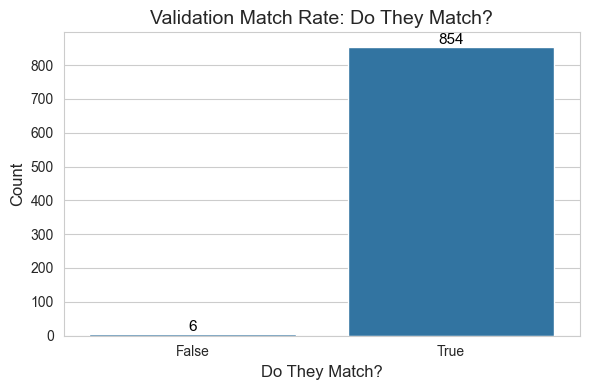

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Create the countplot
ax = sns.countplot(x='Do They Match?', data=TSG_MasterFile)

# Annotate the bars with counts
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

# Labels and title
plt.title("Validation Match Rate: Do They Match?", fontsize=14)
plt.xlabel("Do They Match?", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


In [306]:
false_matches = TSG_MasterFile[TSG_MasterFile['Do They Match?'] == False]
# Optionally, print the rows where the comparison is False
print(false_matches[['studentID', 'TSG Match?', 'Do They Match?']])

    studentID TSG Match?  Do They Match?
108    212819  Not Avail           False
158    210788  Not Avail           False
309    208187  Not Avail           False
363    213008  Not Avail           False
795    213307  Not Avail           False
856    211945  Not Avail           False


In [307]:
Enrollment_report.columns

Index(['Child ID', 'Birthday', 'Enrolled Date', 'AZED ID', 'Name (First)',
       'Name (Last)', 'Name (Middle)', 'Gender Code Description', 'Teacher',
       'Class Name', 'Site Name'],
      dtype='object')

In [308]:
#change itTSG_MasterFile['studentID'] = TSG_MasterFile['studentID'].astype(str).str.strip()
TSG_MasterFile['studentID'] = TSG_MasterFile['studentID'].astype(str).str.strip()
Enrollment_report['Child ID'] = Enrollment_report['Child ID'].astype(str).str.strip()

# Create a dictionary to map 'Child ID' to 'AZED ID' from the Enrollment report
child_id_map = dict(zip(Enrollment_report['Child ID'], Enrollment_report['Site Name']))

# Use the map to fill the 'correct' column in TSG_MasterFile based on 'studentID' matching 'Child ID'
TSG_MasterFile["Class name don't copy"] = TSG_MasterFile['studentID'].map(child_id_map).fillna('Not Avail')
TSG_MasterFile["Class name don't copy"].head()

0    BTF Bellview
1    BTF Bellview
2    BTF Bellview
3    BTF Bellview
4    BTF Bellview
Name: Class name don't copy, dtype: object

In [309]:
print(TSG_MasterFile.iloc[:5, 0:19])

  mm/dd/yy\nbirthdate  raceID  ethID            LastName FirstName  \
0          05/22/2021       1     23  Alcantar Gutierrez     Jorge   
1          04/12/2022       1     23    Armendariz Lujan   Giselle   
2          09/14/2023       1     23    Armendariz Lujan     Mario   
3          10/04/2022       1     23          CRUZ VITAL     ERICK   
4          11/07/2021       1     23  De La Hoz Jimenez.     Sofia   

  firstDayInProgram genderID                         sourceChildID  classID  \
0        10/14/2025        M  2fee9b6d-89e5-4dd1-bfee-7dce0f797198  1417065   
1        08/04/2025        F  a10b61b6-2f5e-4e05-9943-cdf9f0b6a60e  1417065   
2        08/04/2025        M  cc22c37c-97a1-477e-86be-5704ed526690  1060704   
3        10/14/2025        M  0e86ee3d-3abe-4614-acdb-24eb4e44bcb7  1417065   
4        08/04/2025        F  c5f754ea-1fa5-4f54-87ac-3adf0e9f6516  1417065   

   languageID middleInitial studentID  SAISID (For Copy Purpose)   correct  \
0           1             

In [310]:
TSG_MasterFile['studentID'] = TSG_MasterFile['studentID'].astype(str).str.strip()
TSG_Children_Export['Student ID'] = TSG_Children_Export['Student ID'].astype(str).str.strip()


child_id_map = dict(zip(TSG_Children_Export['Student ID'], TSG_Children_Export['Child ID']))


TSG_MasterFile['lkupchild id'] = TSG_MasterFile['studentID'].map(child_id_map).fillna('Not Avail')

print(TSG_MasterFile['lkupchild id'].head())

0    24312610.0
1    23306405.0
2    23306406.0
3    22611189.0
4    21707698.0
Name: lkupchild id, dtype: object


In [311]:
TSG_MasterFile['ChildID (no formula just for copy purpose)']=TSG_MasterFile['lkupchild id']
TSG_MasterFile['ChildID (no formula just for copy purpose)'].head()

0    24312610.0
1    23306405.0
2    23306406.0
3    22611189.0
4    21707698.0
Name: ChildID (no formula just for copy purpose), dtype: object

In [312]:
TSG_MasterFile['CTDSProgramAttendance'] = "072603000"
TSG_MasterFile['CTDSProgramAttendance'] = TSG_MasterFile['CTDSProgramAttendance'].astype(str)
TSG_MasterFile['CTDSProgramAttendance'].head()

0    072603000
1    072603000
2    072603000
3    072603000
4    072603000
Name: CTDSProgramAttendance, dtype: object

In [313]:
TSG_MasterFile['freeLunch_fl'] = TSG_CP_Export['freeLunch_fl']
TSG_MasterFile['IEPID'] = TSG_CP_Export['IEPID']
TSG_MasterFile['partBEntryDate'] = TSG_CP_Export['partBEntryDate']
TSG_MasterFile['IFSPID'] = TSG_CP_Export['IFSPID']
TSG_MasterFile['partCEntryDate'] = TSG_CP_Export['partCEntryDate']
TSG_MasterFile['colorID'] = TSG_CP_Export['colorID']
TSG_MasterFile['spanishObj_FL'] = TSG_CP_Export['spanishObj_FL']
print(TSG_MasterFile.iloc[:5, 15:28])

   Do They Match? Class name don't copy  \
0            True          BTF Bellview   
1            True          BTF Bellview   
2            True          BTF Bellview   
3            True          BTF Bellview   
4            True          BTF Bellview   

  ChildID (no formula just for copy purpose) lkupchild id  \
0                                 24312610.0   24312610.0   
1                                 23306405.0   23306405.0   
2                                 23306406.0   23306406.0   
3                                 22611189.0   22611189.0   
4                                 21707698.0   21707698.0   

  CTDSProgramAttendance  freeLunch_fl  IEPID partBEntryDate partBentrytoolid  \
0             072603000             1      0            NaN              NaN   
1             072603000             1      0            NaN              NaN   
2             072603000             1      0            NaN              NaN   
3             072603000             1      0          

In [314]:
TSG_MasterFile['partBentrytoolid'] = np.where(TSG_MasterFile['IEPID'] == 1, 11, 0)
TSG_MasterFile['partBExitToolID'] = np.where(TSG_MasterFile['IEPID'] == 1, 100, 0)
TSG_MasterFile['partCentrytoolid'] = np.where(TSG_MasterFile['IFSPID'] == 1, 100, 0)

In [315]:
print(TSG_MasterFile.iloc[:5, 15:32])

   Do They Match? Class name don't copy  \
0            True          BTF Bellview   
1            True          BTF Bellview   
2            True          BTF Bellview   
3            True          BTF Bellview   
4            True          BTF Bellview   

  ChildID (no formula just for copy purpose) lkupchild id  \
0                                 24312610.0   24312610.0   
1                                 23306405.0   23306405.0   
2                                 23306406.0   23306406.0   
3                                 22611189.0   22611189.0   
4                                 21707698.0   21707698.0   

  CTDSProgramAttendance  freeLunch_fl  IEPID partBEntryDate  partBentrytoolid  \
0             072603000             1      0            NaN                 0   
1             072603000             1      0            NaN                 0   
2             072603000             1      0            NaN                 0   
3             072603000             1      0      

In [316]:
print(TSG_MasterFile.iloc[:5, 0:15])

  mm/dd/yy\nbirthdate  raceID  ethID            LastName FirstName  \
0          05/22/2021       1     23  Alcantar Gutierrez     Jorge   
1          04/12/2022       1     23    Armendariz Lujan   Giselle   
2          09/14/2023       1     23    Armendariz Lujan     Mario   
3          10/04/2022       1     23          CRUZ VITAL     ERICK   
4          11/07/2021       1     23  De La Hoz Jimenez.     Sofia   

  firstDayInProgram genderID                         sourceChildID  classID  \
0        10/14/2025        M  2fee9b6d-89e5-4dd1-bfee-7dce0f797198  1417065   
1        08/04/2025        F  a10b61b6-2f5e-4e05-9943-cdf9f0b6a60e  1417065   
2        08/04/2025        M  cc22c37c-97a1-477e-86be-5704ed526690  1060704   
3        10/14/2025        M  0e86ee3d-3abe-4614-acdb-24eb4e44bcb7  1417065   
4        08/04/2025        F  c5f754ea-1fa5-4f54-87ac-3adf0e9f6516  1417065   

   languageID middleInitial studentID  SAISID (For Copy Purpose)   correct  \
0           1             

In [317]:
true_count = TSG_MasterFile['Do They Match?'].sum()

# Print the result
print(f"The number of True values in 'Do They Match?' column is: {true_count}")

The number of True values in 'Do They Match?' column is: 854


In [318]:
# Count the number of False values in the 'Do They Match?' column
false_count = (TSG_MasterFile['Do They Match?'] == False).sum()

# Print the result
print(f"The number of False values in 'Do They Match?' column is: {false_count}")

The number of False values in 'Do They Match?' column is: 6


In [319]:
mask_iep = TSG_MasterFile['IEPID'] == 1


# Create the IEP_Children DataFrame by selecting rows where 'IEPID' equals 1
IEP_Children = TSG_MasterFile.loc[mask_iep].copy()
TSG_MasterFile = TSG_MasterFile.loc[~mask_iep].reset_index(drop=True)
# Optionally, you can remove the rows from TSG_MasterFile if you don't want them in the original DataFrame

IEP_Children.to_csv('TSG Import/IEP_Children.csv', index=False)

In [320]:
TSG_MasterFile.shape

(787, 31)

In [321]:
IEP_Children = pd.read_csv("TSG Import/IEP_Children.csv", index_col=None)
IEP_Children.shape

(73, 31)

In [322]:
IEP_data = pd.read_csv('TSG Import/IEP school district info.csv')
# Convert the 'IEP/IFSP Date' column to datetime
IEP_data['IEP/IFSP Date'] = pd.to_datetime(IEP_data['IEP/IFSP Date'], format='%m/%d/%Y')
IEP_data.head()
#Sorting the values based on dates
IEP_data_sorted = IEP_data.sort_values(by='IEP/IFSP Date', ascending=False)
# Drop duplicates based on the 'AZED ID' column, keeping the first (most recent) entry
IEP_data_no_duplicates = IEP_data_sorted.drop_duplicates(subset='AZED ID', keep='first')
# Save the cleaned DataFrame to a new CSV file
IEP_data_no_duplicates.to_csv('TSG Import/cleaned_IEPdata.csv', index=False)

print("Duplicates removed and most recent records saved as 'cleaned_IEPdata.csv'")

Duplicates removed and most recent records saved as 'cleaned_IEPdata.csv'


In [323]:
lea_mapping = {
'SCHOOL DISTRICT - MESA':	'Mesa Unified',
'AZEIP' :	'Arizona Department of Education as your LEA',
'SCHOOL DISTRICT - TEMPE ELEM':'Tempe School District',
'SCHOOL DISTRICT - CHANDLER' :	'Chandler Unified',
'Apache Junction School District' :	'Apache Junction Unified',
'SCHOOL DISTRICT - GILBERT' :	'Gilbert Unified',
'SCHOOL DISTRICT - KYRENE' :	'Kyrene Elementary',
'Washington Elementary School Dis' :	'Washington Elementary',
'SCHOOL DISTRICT - SCOTTSDALE' :	'Scottsdale Unified',
'Deer Valley Unified School Distr' :	'Deer Valley Unified',
'Nadaburg Unified School District' :	'Nadaburg Unified',
'Avondale Elementary SD #44' :	'Avondale Elementary',
'BUCKEYE ELEMENTARY SCHOOL' : 'Buckeye Elementary',
'Cartwright School district' :	'Cartwright Elementary',
'Balsz Elementary School District' :	'Balsz Elementary',
'Creighton School District' :	'Creighton Elementary',
'Dysart Unified School District' :	'Dysart Unified',
'Litchfield School district' :	'Litchfield Elementary',
'Peoria Unified School District' :	'Peoria Unified',
'ROOSEVELT ELEMENTARY SCHOOL DIST' :	'Roosevelt Elementary',
'ROOSEVELT SCHOOL DISTRICT' :	'Roosevelt Elementary',
'SADDLE MTN UNIFIED SCHOOL DIST' :	'Saddle Mountain Unified',
'TOLLESON SCHOOL DISTRICT' :	'Tolleson Elementary'

}

In [324]:
cleaned_IEP_data = pd.read_csv('TSG Import/cleaned_IEPdata.csv')
cleaned_IEP_data.columns
cleaned_IEP_data['LEA or Part C Agency'] = cleaned_IEP_data['LEA or Part C Agency'].replace(lea_mapping)
cleaned_IEP_data.head()


,Agency,SiteName,Class Name,Participant Name,AZED ID,Name (Last),Name (First),LEA or Part C Agency,IEP/IFSP Date,Is Activity
0,MC BTF,EHS A Shining Star,SS-Tod 1,"Botzoc Xol, Alexander",45277169,Botzoc Xol,Alexander,Arizona Department of Education as your LEA,2025-12-08,1
1,MC BTF,EHS A Shining Star,SS-Tod 2,"Guillen Jimenez, Iam",59115164,Guillen Jimenez,Iam,Mesa Unified,2025-12-08,1
2,MC BTF,HS Taft,TFT HS,"Malagon, Elliott",57468227,Malagon,Elliott,Mesa Unified,2025-12-03,0
3,MC BTF,BTF La Mesita,LM EHS I,"Thorne, Sa’Cari",15549439,Thorne,Sa’Cari,Arizona Department of Education as your LEA,2025-12-02,1
4,MC BTF,BTF Paiute,PAI HS,"Fuentes Miranda, Brayant",73249246,Fuentes Miranda,Brayant,Scottsdale Unified,2025-12-02,0


In [325]:
cleaned_IEP_data.columns

Index(['Agency', 'SiteName', 'Class Name', 'Participant Name', 'AZED ID',
       'Name (Last)', 'Name (First)', 'LEA or Part C Agency', 'IEP/IFSP Date',
       'Is Activity'],
      dtype='object')

In [326]:
IEP_Children.columns

Index(['mm/dd/yy\nbirthdate', 'raceID', 'ethID', 'LastName', 'FirstName',
       'firstDayInProgram', 'genderID', 'sourceChildID', 'classID',
       'languageID', 'middleInitial', 'studentID', 'SAISID (For Copy Purpose)',
       'correct', 'TSG Match?', 'Do They Match?', 'Class name don't copy',
       'ChildID (no formula just for copy purpose)', 'lkupchild id',
       'CTDSProgramAttendance', 'freeLunch_fl', 'IEPID', 'partBEntryDate',
       'partBentrytoolid', 'partBExitToolID',
       'CustomResponseValue5 (Copy to import file)', 'IFSPID',
       'partCEntryDate', 'partCentrytoolid', 'spanishObj_FL', 'colorID'],
      dtype='object')

In [327]:
IEP_Children['SAISID (For Copy Purpose)'] = (
    IEP_Children['SAISID (For Copy Purpose)']
    .astype(float)  # Convert to float first
    .astype(int)    # Then to int to remove decimal point
    .astype(str)    # Finally to string
    .str.strip()
)

In [328]:
# Step 1: Force non-numeric to NaN
cleaned_IEP_data['AZED ID'] = pd.to_numeric(cleaned_IEP_data['AZED ID'], errors='coerce')

# Step 2: Drop rows where AZED ID is now NaN
cleaned_IEP_data = cleaned_IEP_data.dropna(subset=['AZED ID'])

# Step 3: Convert cleanly
cleaned_IEP_data['AZED ID'] = (
    cleaned_IEP_data['AZED ID']
    .astype(int)    # now no problem
    .astype(str)    # if you want string for matching
    .str.strip()
)


In [329]:
cleaned_IEP_data['AZED ID']

0      45277169
1      59115164
2      57468227
3      15549439
4      73249246
         ...   
99     28927424
100    36775678
101    92454268
102    51425931
103    24198715
Name: AZED ID, Length: 104, dtype: object

In [330]:
# Create a mapping from 'AZED ID' in cleaned_IEP_data to 'LEA or Part C Agency'
azed_id_map = dict(zip(cleaned_IEP_data['AZED ID'], cleaned_IEP_data['LEA or Part C Agency']))

# Map the 'LEA or Part C Agency' values to 'IEP_Children['CustomResponseValue5 (Copy to import file)']' based on 'SAISID (For Copy Purpose)'
IEP_Children['CustomResponseValue5 (Copy to import file)'] = IEP_Children['SAISID (For Copy Purpose)'] \
    .map(azed_id_map).fillna('Not Avail')
print(IEP_Children['CustomResponseValue5 (Copy to import file)'].head())

0           Mesa Unified
1           Mesa Unified
2           Mesa Unified
3           Mesa Unified
4    Avondale Elementary
Name: CustomResponseValue5 (Copy to import file), dtype: object


In [331]:
IEP_Children.to_csv('TSG Import/IEP_Children.csv', index=False)
print(IEP_Children[['SAISID (For Copy Purpose)', 'CustomResponseValue5 (Copy to import file)']].head())
IEP_Children.shape

  SAISID (For Copy Purpose) CustomResponseValue5 (Copy to import file)
0                  86324455                               Mesa Unified
1                  93815657                               Mesa Unified
2                  57752382                               Mesa Unified
3                  45124213                               Mesa Unified
4                  13533942                        Avondale Elementary


(73, 31)

In [332]:
TSG_MasterFile.to_csv('TSG Import/Final Master File.csv', index=False)

In [333]:
Template= pd.read_csv("TSG Import/TSG final template.csv", index_col=None)

In [334]:
Template.shape

(0, 26)

In [335]:
columns_to_copy = Template.columns.tolist()  # Add other columns as needed

# Update the 'first name', 'last name', etc. in abc and xyz based on 'Do They Match?'

#for column in columns_to_copy:
    # Update abc for rows where 'Do They Match?' is True
    #abc[column] = TSG_MasterFile.apply(lambda row: row[column] if row['Do They Match?'] else abc[column], axis=1)
    
    # Update xyz for rows where 'Do They Match?' is False
    #xyz[column] = TSG_MasterFile.apply(lambda row: row[column] if not row['Do They Match?'] else xyz[column], axis=1)

In [336]:
columns_to_copy

['birthdate',
 'raceID',
 'ethID',
 'lastName',
 'firstName',
 'firstDayInProgram',
 'genderID',
 'sourceChildID',
 'classID',
 'languageID',
 'middleInitial',
 'studentID',
 'SAISID',
 'childID',
 'CTDSProgramAttendance',
 'freeLunch_fl',
 'IEPID',
 'partBEntryDate',
 'partBentrytoolid',
 'partBExitToolID',
 'CustomResponseValue5',
 'IFSPID',
 'partCEntryDate',
 'partCentrytoolid',
 'spanishObj_FL',
 'colorID']

In [337]:
TSG_MasterFile.columns.tolist()

['mm/dd/yy\nbirthdate',
 'raceID',
 'ethID',
 'LastName',
 'FirstName',
 'firstDayInProgram',
 'genderID',
 'sourceChildID',
 'classID',
 'languageID',
 'middleInitial',
 'studentID',
 'SAISID (For Copy Purpose)',
 'correct',
 'TSG Match?',
 'Do They Match?',
 "Class name don't copy",
 'ChildID (no formula just for copy purpose)',
 'lkupchild id',
 'CTDSProgramAttendance',
 'freeLunch_fl',
 'IEPID',
 'partBEntryDate',
 'partBentrytoolid',
 'partBExitToolID',
 'CustomResponseValue5 (Copy to import file)',
 'IFSPID',
 'partCEntryDate',
 'partCentrytoolid',
 'spanishObj_FL',
 'colorID']

In [338]:
NewChildren= pd.read_csv("TSG Import/NewChildren.csv", index_col=None)
print(NewChildren.head())

Empty DataFrame
Columns: [birthdate, raceID, ethID, lastName, firstName, firstDayInProgram, genderID, sourceChildID, classID, languageID, middleInitial, studentID, SAISID, childID, CTDSProgramAttendance, freeLunch_fl, IEPID, partBEntryDate, partBentrytoolid, partBExitToolID, CustomResponseValue5, IFSPID, partCEntryDate, partCentrytoolid, spanishObj_FL, colorID]
Index: []

[0 rows x 26 columns]


In [339]:
print(Template.head())

Empty DataFrame
Columns: [birthdate, raceID, ethID, lastName, firstName, firstDayInProgram, genderID, sourceChildID, classID, languageID, middleInitial, studentID, SAISID, childID, CTDSProgramAttendance, freeLunch_fl, IEPID, partBEntryDate, partBentrytoolid, partBExitToolID, CustomResponseValue5, IFSPID, partCEntryDate, partCentrytoolid, spanishObj_FL, colorID]
Index: []

[0 rows x 26 columns]


In [340]:
NewChildren.columns.tolist()

['birthdate',
 'raceID',
 'ethID',
 'lastName',
 'firstName',
 'firstDayInProgram',
 'genderID',
 'sourceChildID',
 'classID',
 'languageID',
 'middleInitial',
 'studentID',
 'SAISID',
 'childID',
 'CTDSProgramAttendance',
 'freeLunch_fl',
 'IEPID',
 'partBEntryDate',
 'partBentrytoolid',
 'partBExitToolID',
 'CustomResponseValue5',
 'IFSPID',
 'partCEntryDate',
 'partCentrytoolid',
 'spanishObj_FL',
 'colorID']

In [341]:
column_mapping = {
    'mm/dd/yy\nbirthdate': 'birthdate',
    'raceID': 'raceID',
    'ethID': 'ethID',
    'LastName': 'lastName',
    'FirstName': 'firstName',
    'firstDayInProgram': 'firstDayInProgram',
    'genderID': 'genderID',
    'sourceChildID': 'sourceChildID',
    'classID': 'classID',
    'languageID': 'languageID',
    'middleInitial': 'middleInitial',
    'studentID': 'studentID',
    'SAISID (For Copy Purpose)': 'SAISID',
    'ChildID (no formula just for copy purpose)': 'childID',
    'CTDSProgramAttendance': 'CTDSProgramAttendance',
    'freeLunch_fl': 'freeLunch_fl',
    'IEPID': 'IEPID',
    'partBEntryDate': 'partBEntryDate',
    'partBentrytoolid': 'partBentrytoolid',
    'partBExitToolID': 'partBExitToolID',
    'CustomResponseValue5 (Copy to import file)': 'CustomResponseValue5',
    'IFSPID': 'IFSPID',
    'partCEntryDate': 'partCEntryDate',
    'partCentrytoolid': 'partCentrytoolid',
    'spanishObj_FL': 'spanishObj_FL',
    'colorID': 'colorID'
}

In [342]:
IEPChildren_readytoimport = pd.read_csv('TSG Import/IEPChildren_readytoimport.csv', index_col=None)
original_columns = IEPChildren_readytoimport.columns

# Step 2: Create a new empty DataFrame with the same columns and new row count
IEPChildren_readytoimport = pd.DataFrame(columns=original_columns)
IEPChildren_readytoimport = IEPChildren_readytoimport.reindex(range(len(IEP_Children)))
ready_to_import = IEPChildren_readytoimport.copy()

# Loop through the column_mapping and copy the corresponding data from IEP_Children to ready_to_import
for old_col, new_col in column_mapping.items():
    if old_col in IEP_Children.columns:
        # Copy the values from the old column in IEP_Children to the new column in ready_to_import
        ready_to_import[new_col] = IEP_Children[old_col]
    else:
        print(f"Warning: Column '{old_col}' not found in IEP_Children.")
ready_to_import['CTDSProgramAttendance'] = "072603000"
# Save the modified DataFrame to a new CSV file
ready_to_import.to_csv('TSG Import/IEPChildren_readytoimport.csv', index=False)


In [343]:
TSG_MasterFile.columns

Index(['mm/dd/yy\nbirthdate', 'raceID', 'ethID', 'LastName', 'FirstName',
       'firstDayInProgram', 'genderID', 'sourceChildID', 'classID',
       'languageID', 'middleInitial', 'studentID', 'SAISID (For Copy Purpose)',
       'correct', 'TSG Match?', 'Do They Match?', 'Class name don't copy',
       'ChildID (no formula just for copy purpose)', 'lkupchild id',
       'CTDSProgramAttendance', 'freeLunch_fl', 'IEPID', 'partBEntryDate',
       'partBentrytoolid', 'partBExitToolID',
       'CustomResponseValue5 (Copy to import file)', 'IFSPID',
       'partCEntryDate', 'partCentrytoolid', 'spanishObj_FL', 'colorID'],
      dtype='object')

In [344]:

# Ensure 'Do They Match?' is a boolean (True/False)
TSG_MasterFile['Do They Match?'] = TSG_MasterFile['Do They Match?'].astype(bool)
Template = pd.DataFrame(index=range(len(TSG_CP_Export)))
NewChildren = pd.DataFrame(index=range(len(TSG_CP_Export)))
Template = pd.DataFrame(columns=column_mapping.values())
NewChildren = pd.DataFrame(columns=column_mapping.values())


for tsg_master_col, template_col in column_mapping.items():
    # Create masks for True and False conditions
    mask_true = TSG_MasterFile['Do They Match?'] == True
    mask_false = TSG_MasterFile['Do They Match?'] == False
    
       
   
    Template[template_col] = TSG_MasterFile.loc[mask_true, tsg_master_col]
    
  
    NewChildren[template_col] = TSG_MasterFile.loc[mask_false, tsg_master_col]

In [345]:
NewChildren.head()

,birthdate,raceID,ethID,lastName,firstName,firstDayInProgram,genderID,sourceChildID,classID,languageID,...,IEPID,partBEntryDate,partBentrytoolid,partBExitToolID,CustomResponseValue5,IFSPID,partCEntryDate,partCentrytoolid,spanishObj_FL,colorID
94,01/28/2024,2,1,Griffin,Lyaire,12/08/2025,M,40c0a132-8ec4-4600-b121-6927f2686050,1060705,1,...,0,NaN,0,0,NaN,0,NaN,0,0,
281,03/24/2024,2,1,Moore-Pettaway,Ta'John,12/03/2025,M,113be677-0c5a-4abb-b081-24a059264b97,1063632,1,...,0,NaN,0,0,NaN,0,NaN,0,0,
333,09/12/2023,2,1,Jones,Vayden,12/04/2025,M,852afb96-1128-42de-9896-b829fec12523,1913461,1,...,0,NaN,0,0,NaN,0,NaN,0,0,
732,09/02/2022,37,1,Rogers,Raymond,12/03/2025,M,531899f2-e30d-486e-8988-381a1e49b40b,1734128,1,...,0,NaN,0,0,NaN,0,NaN,0,0,4
783,11/18/2022,45,1,Shafiq,Abdullah,12/03/2025,M,b0b7cc84-3bf9-489a-b9a8-d639c1e64cac,1947552,13,...,0,NaN,0,0,NaN,0,NaN,0,0,4


In [346]:
Template.to_csv('TSG Import/Template_ready_to_import.csv', index=False)
NewChildren.to_csv('TSG Import/NewChildren_ready_to_import.csv', index=False)

In [347]:
Template.shape

(782, 26)

In [348]:
NewChildren.shape

(5, 26)